In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
### Parafusos Caixa

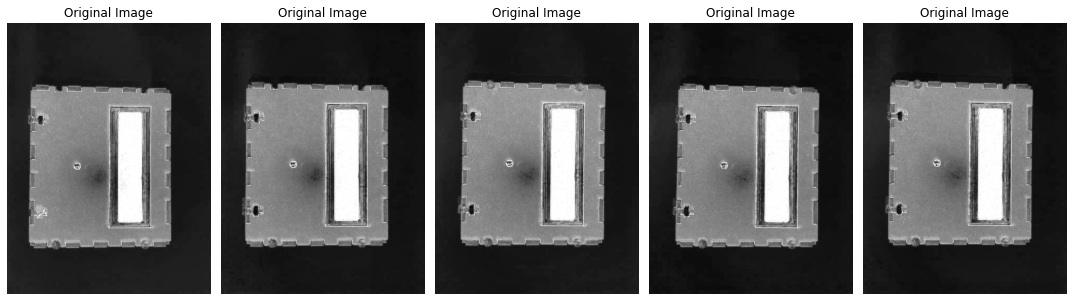

In [27]:
Fig1_caixa1 = cv2.imread("Figuras_APS3/Fig1_Caixa1.jpg", cv2.IMREAD_COLOR)
Fig1_caixa2 = cv2.imread("Figuras_APS3/Fig1_Caixa2.jpg", cv2.IMREAD_COLOR)
Fig1_caixa3 = cv2.imread("Figuras_APS3/Fig1_Caixa3.jpg", cv2.IMREAD_COLOR)
Fig1_caixa4 = cv2.imread("Figuras_APS3/Fig1_Caixa4.jpg", cv2.IMREAD_COLOR)
Fig1_caixa5 = cv2.imread("Figuras_APS3/Fig1_Caixa5.jpg", cv2.IMREAD_COLOR)

img_Caixa1_HSV = cv2.cvtColor(Fig1_caixa1,cv2.COLOR_BGR2HSV)
img_Caixa2_HSV = cv2.cvtColor(Fig1_caixa2,cv2.COLOR_BGR2HSV)
img_Caixa3_HSV = cv2.cvtColor(Fig1_caixa3,cv2.COLOR_BGR2HSV)
img_Caixa4_HSV = cv2.cvtColor(Fig1_caixa4,cv2.COLOR_BGR2HSV)
img_Caixa5_HSV = cv2.cvtColor(Fig1_caixa5,cv2.COLOR_BGR2HSV)

[H1,S1,V1] = cv2.split(img_Caixa1_HSV)
[H2,S2,V2] = cv2.split(img_Caixa2_HSV)
[H3,S3,V3] = cv2.split(img_Caixa3_HSV)
[H4,S4,V4] = cv2.split(img_Caixa4_HSV)
[H5,S5,V5] = cv2.split(img_Caixa5_HSV)



plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(S1 , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(S2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(S3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(S4, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(S5, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()


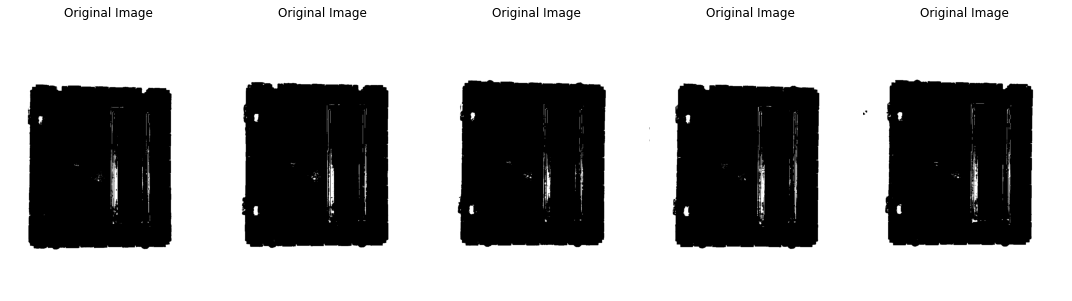

In [ ]:
FigParafuso1 = np.where((S1<50) , 255, 0).astype(np.uint8)
FigParafuso2 = np.where((S2<50) , 255, 0).astype(np.uint8)
FigParafuso3 = np.where((S3<50) , 255, 0).astype(np.uint8)
FigParafuso4 = np.where((S4<50) , 255, 0).astype(np.uint8)
FigParafuso5 = np.where((S5<50) , 255, 0).astype(np.uint8)


plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(FigParafuso1 , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(FigParafuso2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(FigParafuso3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(FigParafuso4, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(FigParafuso5, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

 
  

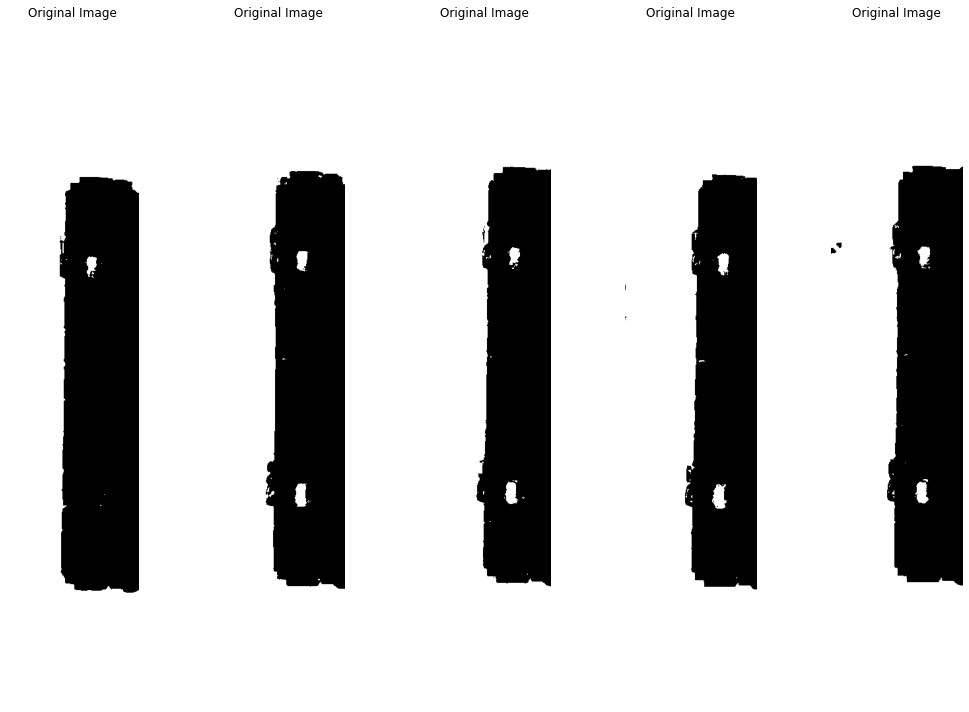

In [39]:
FigParafuso1Esq =FigParafuso1 [0:FigParafuso1.shape[0],0:200]
FigParafuso2Esq =FigParafuso2 [0:FigParafuso2.shape[0],0:200]
FigParafuso3Esq =FigParafuso3 [0:FigParafuso3.shape[0],0:200]
FigParafuso4Esq =FigParafuso4 [0:FigParafuso4.shape[0],0:200]
FigParafuso5Esq =FigParafuso5 [0:FigParafuso5.shape[0],0:200]

plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(FigParafuso1Esq , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(FigParafuso2Esq, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(FigParafuso3Esq, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(FigParafuso4Esq, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(FigParafuso5Esq, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

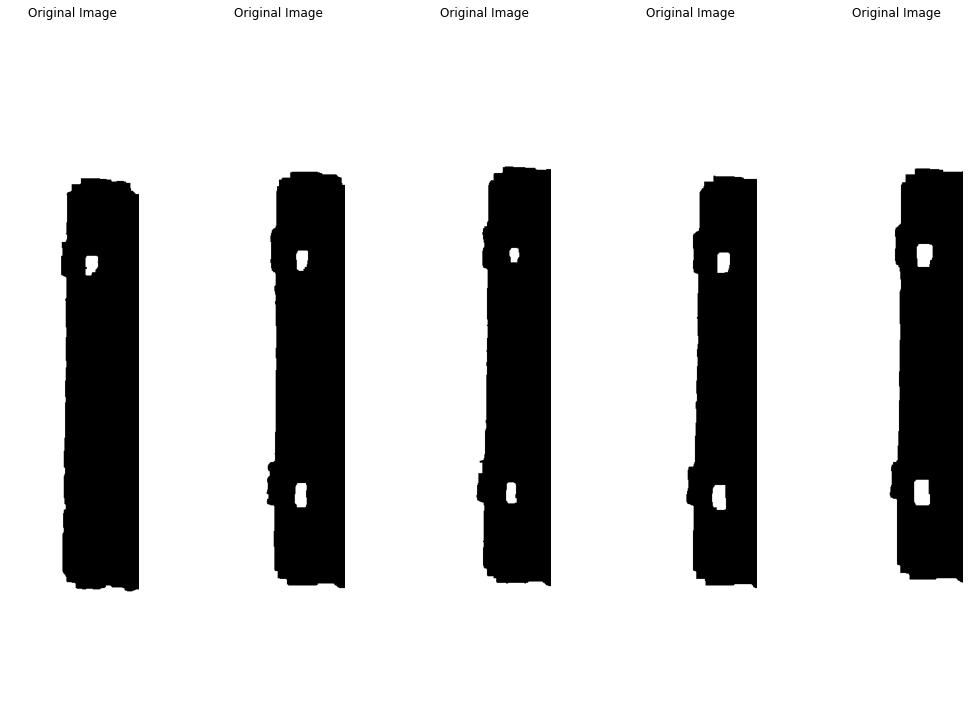

In [56]:
def EroDil (k1,k2,i1,i2,Img):
    kernel1 = np.ones((k1,k1),np.uint8)
    kernel2 = np.ones((k2,k2),np.uint8)
    Img_eroded = cv2.erode(Img,kernel1,iterations=i1)
    Img_Final = cv2.dilate(Img_eroded,kernel2,iterations=i2)
    return(Img_Final)

FigParafuso1Esq_Limpo =EroDil(3,3,1,3,FigParafuso1Esq)
FigParafuso2Esq_Limpo =EroDil(3,3,2,3,FigParafuso2Esq)
FigParafuso3Esq_Limpo =EroDil(3,3,3,3,FigParafuso3Esq)
FigParafuso4Esq_Limpo =EroDil(3,3,3,5,FigParafuso4Esq)
FigParafuso5Esq_Limpo =EroDil(3,3,3,7,FigParafuso5Esq)

plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(FigParafuso1Esq_Limpo , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(FigParafuso2Esq_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(FigParafuso3Esq_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(FigParafuso4Esq_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(FigParafuso5Esq_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [144]:
def blobs(Img):
    # Set up the detector with default parameters.
    params = cv2.SimpleBlobDetector_Params()
    # Set blob color (0=black, 255=white)
    params.filterByColor = True
    params.blobColor = 255
    # Filter by Area
    params.filterByArea = True
    params.minArea = 1
    params.maxArea = 20000
    # Filter by Circularity
    params.filterByCircularity = False
    # params.minCircularity = 0.8
    # #params.maxCircularity = 1.2
    # Filter by Convexity
    params.filterByConvexity = False
    #params.minConvexity = 0.87
    #params.maxConvexity = 1
    # Filter by Inertia
    params.filterByInertia = False
    #params.minInertiaRatio = 0.01
    #params.maxInertiaRatio = 1
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create(params)
    # Detect blobs
    KP = detector.detect(Img)
    
    imgCor = cv2.cvtColor(Img,cv2.COLOR_GRAY2RGB)
    i=1
    for KPi in KP:
        print("Blob_", i, ": X= ", KPi.pt[0], " Y= ", KPi.pt[1], " size=", KPi.size**2, " ang=", KPi.angle)
        imgCor = cv2.putText(imgCor, str(i), (int(KPi.pt[0]),int(KPi.pt[1])), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255))
        i=i+1   
    if len(KP)==0:
        return("Faltando ambos parafusos da Esquerda")
    if len (KP)==1:
        if KP[0].pt[1]<450:
            return("Faltando um Parafuso na parte inferior da Esquerda")
        if KP[0].pt[1]>450:
            return("Faltando um Parafuso na parte superior da Esquerda")
    if len(KP)==2:
        return("Possui todos os Parafusos da esquerda")
print(blobs(FigParafuso1Esq_Limpo))
print(blobs(FigParafuso2Esq_Limpo))
print(blobs(FigParafuso3Esq_Limpo))
print(blobs(FigParafuso4Esq_Limpo))
print(blobs(FigParafuso5Esq_Limpo))



Blob_ 1 : X=  127.34278106689453  Y=  368.97430419921875  size= 602.4092775017234  ang= -1.0
Faltando um Parafuso na parte inferior da Esquerda
Blob_ 1 : X=  132.74806213378906  Y=  720.1239013671875  size= 848.3980650140438  ang= -1.0
Blob_ 2 : X=  134.30987548828125  Y=  361.7139587402344  size= 602.241601362417  ang= -1.0
Possui todos os Parafusos da esquerda
Blob_ 1 : X=  139.23704528808594  Y=  716.8062133789062  size= 622.6989030852601  ang= -1.0
Blob_ 2 : X=  143.94671630859375  Y=  354.0122985839844  size= 340.6956584123109  ang= -1.0
Possui todos os Parafusos da esquerda
Blob_ 1 : X=  142.37969970703125  Y=  723.3240356445312  size= 994.6372698153173  ang= -1.0
Blob_ 2 : X=  148.67092895507812  Y=  365.60064697265625  size= 750.2362026914525  ang= -1.0
Possui todos os Parafusos da esquerda
Blob_ 1 : X=  137.06858825683594  Y=  716.3290405273438  size= 1237.6343002875947  ang= -1.0
Blob_ 2 : X=  141.07504272460938  Y=  354.2909851074219  size= 1057.2400695467368  ang= -1.0
Poss

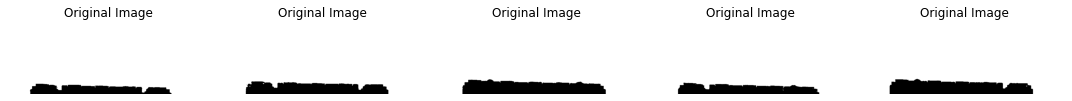

In [115]:
FigParafuso1Topo =FigParafuso1 [0:275,0:FigParafuso1.shape[1]]
FigParafuso2Topo =FigParafuso2 [0:275,0:FigParafuso2.shape[1]]
FigParafuso3Topo =FigParafuso3 [0:275,0:FigParafuso3.shape[1]]
FigParafuso4Topo =FigParafuso4 [0:275,0:FigParafuso4.shape[1]]
FigParafuso5Topo =FigParafuso5 [0:275,0:FigParafuso5.shape[1]]

plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(FigParafuso1Topo , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(FigParafuso2Topo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(FigParafuso3Topo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(FigParafuso4Topo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(FigParafuso5Topo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

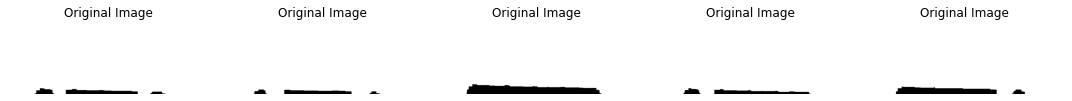

In [123]:
FigParafuso1Topo_Limpo =EroDil(3,3,1,17,FigParafuso1Topo)
FigParafuso2Topo_Limpo =EroDil(3,3,1,27,FigParafuso2Topo)
FigParafuso3Topo_Limpo =EroDil(3,3,1,17,FigParafuso3Topo)
FigParafuso4Topo_Limpo =EroDil(3,3,1,20,FigParafuso4Topo)
FigParafuso5Topo_Limpo =EroDil(3,3,1,25,FigParafuso5Topo)

plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(FigParafuso1Topo_Limpo , cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(FigParafuso2Topo_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(FigParafuso3Topo_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(FigParafuso4Topo_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(FigParafuso5Topo_Limpo, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [141]:
def blobs2(Img):
    # Set up the detector with default parameters.
    params2 = cv2.SimpleBlobDetector_Params()
    # Set blob color (0=black, 255=white)
    params2.filterByColor = True
    params2.blobColor = 255
    # Filter by Area
    params2.filterByArea = False
    # params2.minArea = 1
    # params2.maxArea = 20000
    # Filter by Circularity
    params2.filterByCircularity = False
    # params.minCircularity = 0.8
    # #params.maxCircularity = 1.2
    # Filter by Convexity
    params2.filterByConvexity = False
    #params.minConvexity = 0.87
    #params.maxConvexity = 1
    # Filter by Inertia
    params2.filterByInertia = False
    #params.minInertiaRatio = 0.01
    #params.maxInertiaRatio = 1
    # Set up the detector with default parameters.
    detector2 = cv2.SimpleBlobDetector_create(params2)
    # Detect blobs
    KP2 = detector2.detect(Img)
    
    imgCor2 = cv2.cvtColor(Img,cv2.COLOR_GRAY2RGB)
    i=1
    for KPi in KP2:
        print("Blob_", i, ": X= ", KPi.pt[0], " Y= ", KPi.pt[1], " size=", KPi.size**2, " ang=", KPi.angle)
        imgCor2 = cv2.putText(imgCor2, str(i), (int(KPi.pt[0]),int(KPi.pt[1])), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255))
        i=i+1
    if len (KP2)==1:
        return("possui todos parafusos no topo")
    if len(KP2)==2:
        if KP2[0].pt[0]<500:
            return ("Faltando Parafuso na Esquerda do Topo")
        if KP2[0].pt[0]>500:
            return ("Faltando Parafuso na Direita do Topo")
    if len(KP2)==3:
        return("Faltando os dois Parafusos do Topo")
print(blobs2(255-FigParafuso1Topo_Limpo))
print(blobs2(255-FigParafuso2Topo_Limpo))
print(blobs2(255-FigParafuso3Topo_Limpo))
print(blobs2(255-FigParafuso4Topo_Limpo))
print(blobs2(255-FigParafuso5Topo_Limpo))


Blob_ 1 : X=  573.2874145507812  Y=  270.3070983886719  size= 989.3734638370224  ang= -1.0
Blob_ 2 : X=  349.9193115234375  Y=  267.47589111328125  size= 20619.261446111836  ang= -1.0
Blob_ 3 : X=  142.89781188964844  Y=  265.489990234375  size= 1870.0646064238535  ang= -1.0
Faltando os dois Parafusos do Topo
Blob_ 1 : X=  584.6254272460938  Y=  270.2359619140625  size= 373.02577517799  ang= -1.0
Blob_ 2 : X=  362.211669921875  Y=  267.970703125  size= 18215.04362701648  ang= -1.0
Blob_ 3 : X=  150.37355041503906  Y=  267.1236267089844  size= 945.7047926071427  ang= -1.0
Faltando os dois Parafusos do Topo
Blob_ 1 : X=  356.55108642578125  Y=  260.2144470214844  size= 72528.91034350637  ang= -1.0
possui todos parafusos no topo
Blob_ 1 : X=  404.92919921875  Y=  268.3863830566406  size= 36264.44221200049  ang= -1.0
Blob_ 2 : X=  163.96591186523438  Y=  265.5443115234375  size= 1561.7812898391858  ang= -1.0
Faltando Parafuso na Esquerda do Topo
Blob_ 1 : X=  595.0322875976562  Y=  267.300